In [1]:
import pygsp as p

import numpy as np
import matplotlib.pyplot as plt

import cv2

from ripser import ripser
from persim import plot_diagrams

from scipy import fft

# FFT example

In [2]:
def real_fft_plot(xs, real_signal = True):
    n = len(xs)
    if not real_signal:
        return np.r_[-n//2:n//2 + 1:1], np.hstack((xs[n//2 :]/(n), xs[0]/n, xs[1:n//2 + 1]/(n)))
    else:
        return np.r_[0:n//2 + 1:1], np.hstack((xs[0]/n, xs[1:n//2 + 1]/(n) + xs[n//2 + (len(xs) % 2):][::-1]/(n),))   

In [3]:
T = 2 * np.pi
n = 150
dc = 0
xs = dc #+ 2 * np.sin(np.r_[0:2 * np.pi : 2 * np.pi / n]) + 3 * np.sin(25 * np.r_[0:2 * np.pi : 2 * np.pi / n])

freqs, coef_freqs = [], []
for i in range(10):
    freq = int(10 * np.random.rand()) + 1
    coef_freq = int(10 * np.random.rand()) + 1
    xs += coef_freq * np.sin(freq * np.r_[0 : T : T / n])
    
    freqs += [freq]
    coef_freqs += [coef_freq]

In [4]:
fs = fft.fft(xs)
ifs = fft.ifft(fs)
pfs = np.abs(fs)

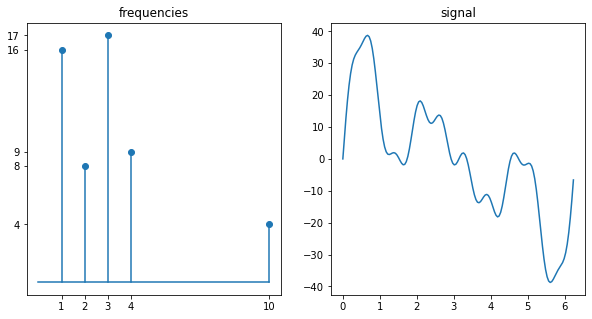

In [5]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))

ns, ps = real_fft_plot(pfs)
xts = []
yts = []
for i, p in enumerate(ps):
    if p > 1e-10:
        ax[0].plot([i, i],[0, p], color = 'tab:blue')
        ax[0].scatter([i], [p], color = 'tab:blue')
        xts += [i]
        yts += [p]
ax[0].plot([0, xts[-1]], [0, 0], )        
        
ax[1].plot(np.r_[0 : T : T / n], xs)

ax[0].set_xticks(xts)
ax[0].set_yticks(yts)

ax[0].set_title('frequencies')
ax[1].set_title('signal')
plt.show()

In [6]:
freqs, coef_freqs

([3, 10, 3, 1, 2, 3, 10, 1, 4, 3], [4, 2, 2, 6, 8, 7, 2, 10, 9, 4])

# Sampling

In [7]:
def f(x, fs = freqs, cfs = coef_freqs):
    
    return sum([c * np.sin(f * x) for (c, f) in zip(cfs, fs)])

def g(x, fs = freqs, cfs = coef_freqs):
    
    return sum([-c * np.cos(f * x) for (c, f) in zip(cfs, fs)])

max_freq = max(freqs)

In [8]:
samples = f(np.r_[0 : T : T / (3 * max_freq)])
3 * max_freq

30

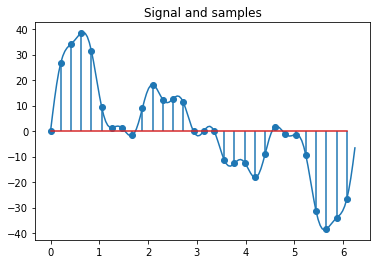

In [9]:
plt.plot(np.r_[0 : T : T / n], xs)
plt.stem(np.r_[0 : T : T / (3 * max_freq)], samples)
plt.title('Signal and samples')
plt.show()

In [10]:
sfs = fft.fft(samples)
psfs = np.abs(sfs)

rec_signal = lambda x: f(x, *real_fft_plot(psfs))

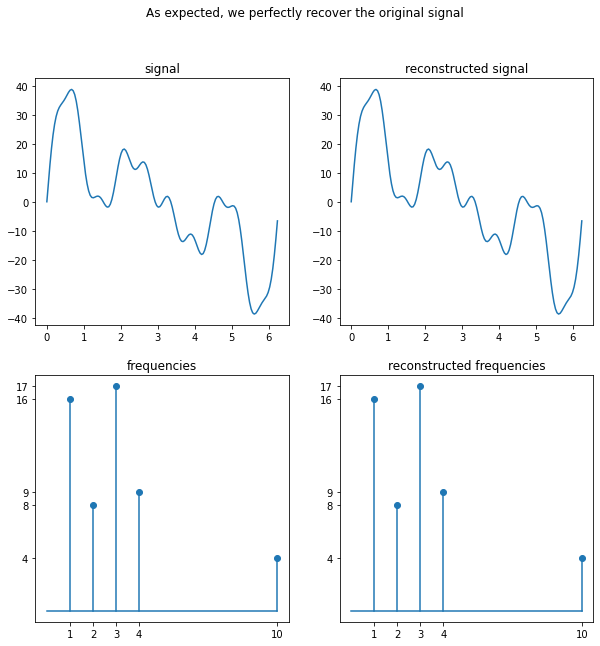

In [11]:
fig, ax = plt.subplots(2, 2, figsize = (10, 10))

ns, ps = real_fft_plot(pfs)
xts = []
yts = []


for i, p in enumerate(ps):
    if p > 1e-10:
        ax[1][0].plot([i, i],[0, p], color = 'tab:blue')
        ax[1][0].scatter([i], [p], color = 'tab:blue')
        xts += [i]
        yts += [p]
        

ax[1][0].plot([0, xts[-1]], [0, 0], )        
        
ax[0][0].plot(np.r_[0 : T : T / n], xs)

ax[1][0].set_xticks(xts)
ax[1][0].set_yticks(yts)


ax[0][1].plot(np.r_[0 : T : T / n], rec_signal(np.r_[0 : T : T / n]))


rec_ns, rec_ps = real_fft_plot(psfs)
rec_xts = []
rec_yts = []

for i, p in enumerate(rec_ps):
    if p > 1e-10:
        ax[1][1].plot([i, i],[0, p], color = 'tab:blue')
        ax[1][1].scatter([i], [p], color = 'tab:blue')
        rec_xts += [i]
        rec_yts += [p]

ax[1][1].plot([0, xts[-1]], [0, 0], )        
        

ax[1][1].set_xticks(rec_xts)
ax[1][1].set_yticks(rec_yts)
        
ax[1][0].set_title('frequencies')
ax[0][0].set_title('signal')

ax[1][1].set_title('reconstructed frequencies')
ax[0][1].set_title('reconstructed signal')

fig.suptitle('As expected, we perfectly recover the original signal')
plt.show()

# Audio example

In [12]:
from scipy.io import wavfile

In [13]:
sample_rate, w = wavfile.read('audios/violin.wav')

In [14]:
len(w)/sample_rate #duração do audio

10.5321768707483

In [15]:
audio_fft = fft.fft(w)
p_audio_fft = np.abs(audio_fft)

In [16]:
max_freq_audio = 40000
samples = w[::len(w)//(2 * max_freq_audio)] #5
len(samples) #maior que o dobro da suposta maior frequencia

92894

In [17]:
samples_fft = fft.fft(samples)
p_samples_fft = np.abs(samples_fft)

In [18]:
audio_ns, audio_ps = real_fft_plot(p_audio_fft)
samples_ns, samples_ps = real_fft_plot(p_samples_fft)

In [19]:
samples_ifft = fft.ifft(samples_fft)
samples_ifft_int = samples_ifft.real.astype(np.int16)

In [20]:
len(w), sample_rate, len(w)/sample_rate, len(samples_ifft), len(samples_ifft)/9000

(464469, 44100, 10.5321768707483, 92894, 10.321555555555555)

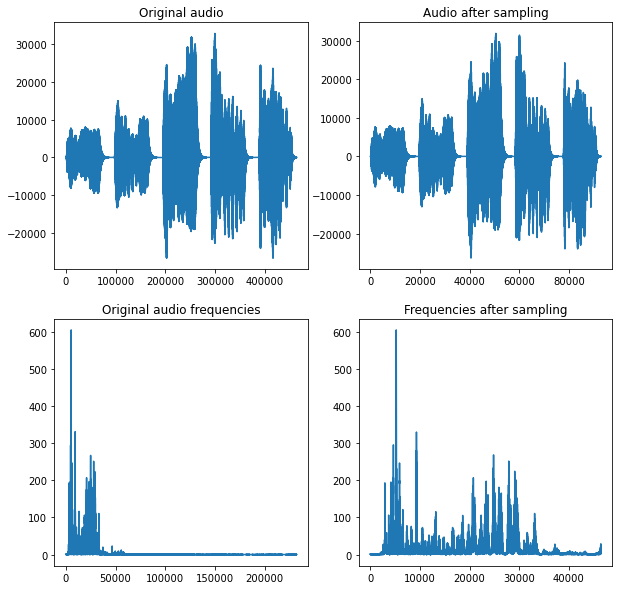

In [21]:
fig, ax = plt.subplots(2, 2, figsize = (10,10))
ax[0][0].plot(w)
ax[0][1].plot(samples_ifft_int)

ax[1][0].plot(audio_ps)
ax[1][1].plot(samples_ps)


ax[0][0].set_title('Original audio')
ax[0][1].set_title('Audio after sampling')

ax[1][0].set_title('Original audio frequencies')
ax[1][1].set_title('Frequencies after sampling')
plt.show()

In [22]:
wavfile.write('audios/new_violin.wav', 9000, samples_ifft_int) #change sample_rate so audio has approximately the same length

# GIF

In [23]:
def imag_fft_plot(xs, real_signal = True):
    n = len(xs)
    if not real_signal:
        return np.r_[-n//2:n//2 + 1:1], np.hstack((xs[n//2 :]/(n), xs[0]/n, xs[1:n//2 + 1]/(n)))
    else:
        return np.r_[0:n//2 + 1:1], np.hstack((xs[0]/n, -xs[1:n//2 + 1]/(n) + xs[n//2 + (len(xs) % 2):][::-1]/(n),))   

In [24]:
T = 2 * np.pi
n = 300
dc = 0
xs = dc #+ 2 * np.sin(np.r_[0:2 * np.pi : 2 * np.pi / n]) + 3 * np.sin(25 * np.r_[0:2 * np.pi : 2 * np.pi / n])

freqs, coef_freqs = [], []
for i in range(10):
    freq = int(20 * np.random.rand()) + 1
    coef_freq = int(10 * np.random.rand()) + 1
    xs += coef_freq * np.sin(freq * np.r_[0 : T : T / n])
    
    freqs += [freq]
    coef_freqs += [coef_freq]
    
fs = fft.fft(xs)
ifs = fft.ifft(fs)
pfs = np.abs(fs)

In [25]:
signal = lambda x: f(x, *real_fft_plot(pfs))

In [26]:
max(freqs)

20

In [27]:
for m in range(1, 45):
    
#     fig, ax = plt.subplots(1, 2, figsize = (10, 5))
    plt.figure(figsize = (10,10))
    plt.ylim(-60, 60)
#     fig.suptitle('Sampling example, max frequency is 20')
    x_coord = np.linspace(0, T, num = m, endpoint = False)
    y_coord = signal(x_coord)

    points = np.linspace(0, T, num = n, endpoint = False)

    yfs = fft.fft(y_coord)
    yfs_real = yfs.real
    yfs_imag = yfs.imag
    r_m = lambda x: f(x, *imag_fft_plot(yfs_imag)) + g(x, *real_fft_plot(yfs_real)) 

    plt.plot(points, signal(points), label = 'original signal')
    plt.scatter(x_coord, y_coord, color = 'black', label = 'sample points')
    
#     ax[0].plot(*real_fft_plot(np.abs(yfs)))
    
    plt.plot(points, r_m(points), label = 'reconstructed signal')
    plt.title('Sampling example, max frequency is 20: ' + str(m) + ' samples')
#     ax[0].set_title('Frequencies')
    plt.legend()
#     plt.savefig('imgs/test3/' + str(m))
    plt.close()

In [28]:
import imageio

In [29]:
# usar as imagens salvas acima para fazer um gif
images = []
filenames = ['imgs/test3/' + str(i) + '.png' for i in range(1, 45)]
for filename in filenames:
    images.append(imageio.imread(filename))
# imageio.mimsave('gifs/test3/samplingfft.gif', images)

In [34]:
from IPython.display import Video

Video("gifs/test3/samplingfft.mp4", embed = True)